In [41]:
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
movies = pd.read_csv('./ml-latest-small/movies.csv')

ratings = pd.read_csv('./ml-latest-small/ratings.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
# movies.drop('genres', axis=1, inplace=True)

ratings.drop('timestamp', axis=1, inplace=True)

### Merge `movies` and `ratings`

In [7]:
ratings = pd.merge(ratings, movies, how='inner', on='movieId')

In [8]:
ratings.head()

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
1,7,31,3.0,Dangerous Minds (1995),Drama
2,31,31,4.0,Dangerous Minds (1995),Drama
3,32,31,4.0,Dangerous Minds (1995),Drama
4,36,31,3.0,Dangerous Minds (1995),Drama


In [9]:
ratings.shape

(100004, 5)

In [10]:
ratings.groupby('movieId').count().max()

userId    341
rating    341
title     341
genres    341
dtype: int64

In [11]:
ratings.groupby('userId').count().head()

,movieId,rating,title,genres
userId,,,,
1,20,20,20,20
2,76,76,76,76
3,51,51,51,51
4,204,204,204,204
5,100,100,100,100


In [53]:
top_ten = ratings.movieId.value_counts().to_frame().head(10)

In [58]:
top_ten = top_ten.reset_index()

In [63]:
top_ten.rename(columns={'index':'movieId',
                       'movieId':'count'}, inplace=True)

In [81]:
titles = ratings.drop(['userId', 'rating', 'genres'], axis=1)

In [85]:
titles = titles.drop_duplicates()

In [87]:
top_ten = pd.merge(top_ten, titles, how='left', on='movieId')

In [106]:
top_ten

,movieId,count,title
0,356,341,Forrest Gump (1994)
1,296,324,Pulp Fiction (1994)
2,318,311,"Shawshank Redemption, The (1994)"
3,593,304,"Silence of the Lambs, The (1991)"
4,260,291,Star Wars: Episode IV - A New Hope (1977)
5,480,274,Jurassic Park (1993)
6,2571,259,"Matrix, The (1999)"
7,1,247,Toy Story (1995)
8,527,244,Schindler's List (1993)
9,589,237,Terminator 2: Judgment Day (1991)


Text(0.5,1,'Most Rated Movies')

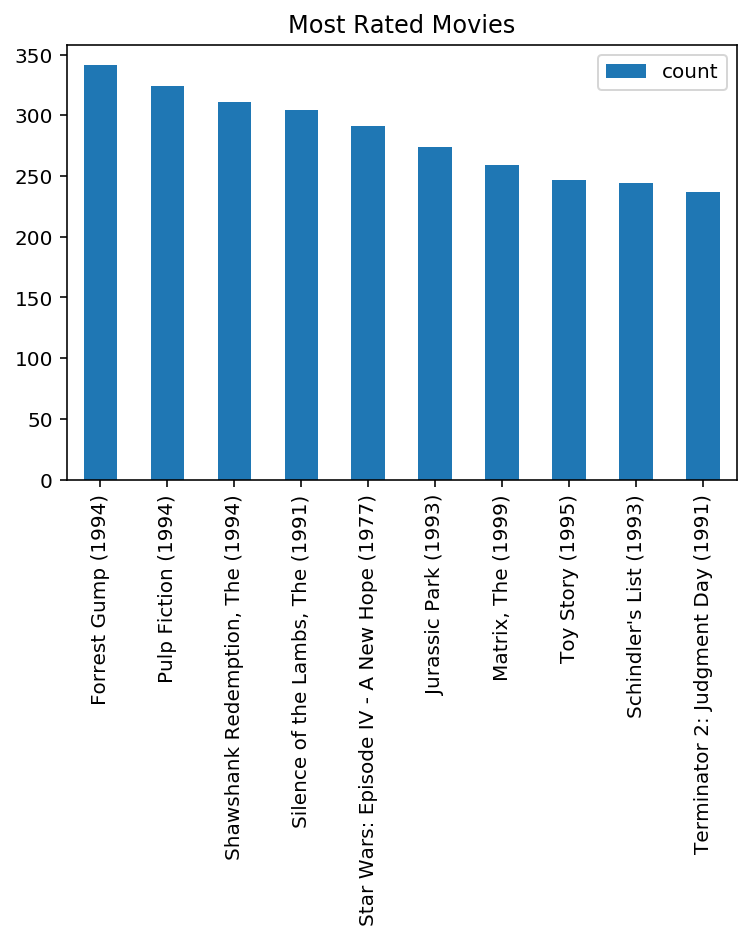

In [121]:
top_ten.drop(['movieId'], axis=1).plot(kind='bar')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Forrest Gump (1994)', 
                                            'Pulp Fiction (1994)', 
                                            'Shawshank Redemption, The (1994)',
                                            'Silence of the Lambs, The (1991)',
                                            'Star Wars: Episode IV - A New Hope (1977)',
                                            'Jurassic Park (1993)',
                                            'Matrix, The (1999)',
                                            'Toy Story (1995)',
                                            "Schindler's List (1993)",
                                            'Terminator 2: Judgment Day (1991)'], rotation=90)
plt.title('Most Rated Movies')

In [13]:
ratings.userId.value_counts().to_frame()

,userId
547,2391
564,1868
624,1735
15,1700
73,1610
452,1340
468,1291
380,1063
311,1019
30,1011


In [14]:
ratings[ratings['movieId'] == 356].describe()

,userId,movieId,rating
count,341.000000,341.0,341.000000
mean,334.595308,356.0,4.054252
std,194.589070,0.0,0.871521
min,2.000000,356.0,1.000000
25%,161.000000,356.0,3.500000
50%,333.000000,356.0,4.000000
75%,508.000000,356.0,5.000000
max,671.000000,356.0,5.000000


In [15]:
ratings.groupby('movieId').count().head()

,userId,rating,title,genres
movieId,,,,
1,247,247,247,247
2,107,107,107,107
3,59,59,59,59
4,13,13,13,13
5,56,56,56,56


In [16]:
ratings.drop(['userId', 'movieId', 'genres'], axis=1).groupby('rating').count().plot(kind='bar', title='Ratings Count');

In [17]:
ratings.rating.mean()

3.543608255669773

In [18]:
ratings.drop(['userId', 'movieId', 'genres'], axis=1).groupby('rating').describe()

title                                                               
        count unique                                                top freq
rating                                                                      
0.5      1101    868  Star Wars: Episode II - Attack of the Clones (...    7
1.0      3326   1959                  Ace Ventura: Pet Detective (1994)   18
1.5      1687   1204               Independence Day (a.k.a. ID4) (1996)    8
2.0      7271   3130                  Ace Ventura: Pet Detective (1994)   26
2.5      4449   2408   Star Wars: Episode I - The Phantom Menace (1999)   15
3.0     20064   4771                                      Batman (1989)   80
3.5     10538   3612                              Monsters, Inc. (2001)   26
4.0     28750   5140                                Forrest Gump (1994)  113
4.5      7723   2454                                 Matrix, The (1999)   47
5.0     15095   3127                   Shawshank Redemption, The (1994)  170

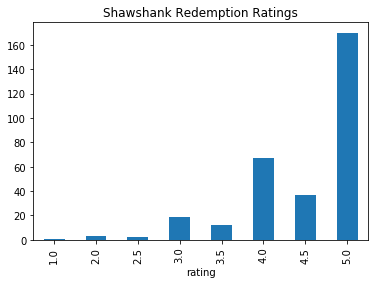

In [19]:
ratings[ratings.title == 'Shawshank Redemption, The (1994)'].drop(['userId', 'movieId', 'genres'], 
                                                                  axis=1).groupby('rating').count().plot(kind='bar', legend=False, 
                                                                                                         title='Shawshank Redemption Ratings');

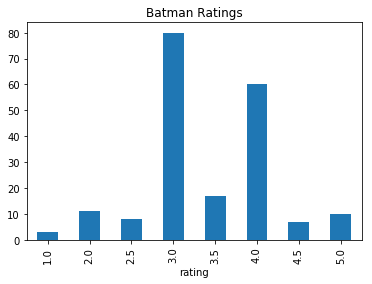

In [20]:
ratings[ratings.title == 'Batman (1989)'].drop(['userId', 'movieId', 'genres'], 
                                                                  axis=1).groupby('rating').count().plot(kind='bar', legend=False, 
                                                                                                         title='Batman Ratings');

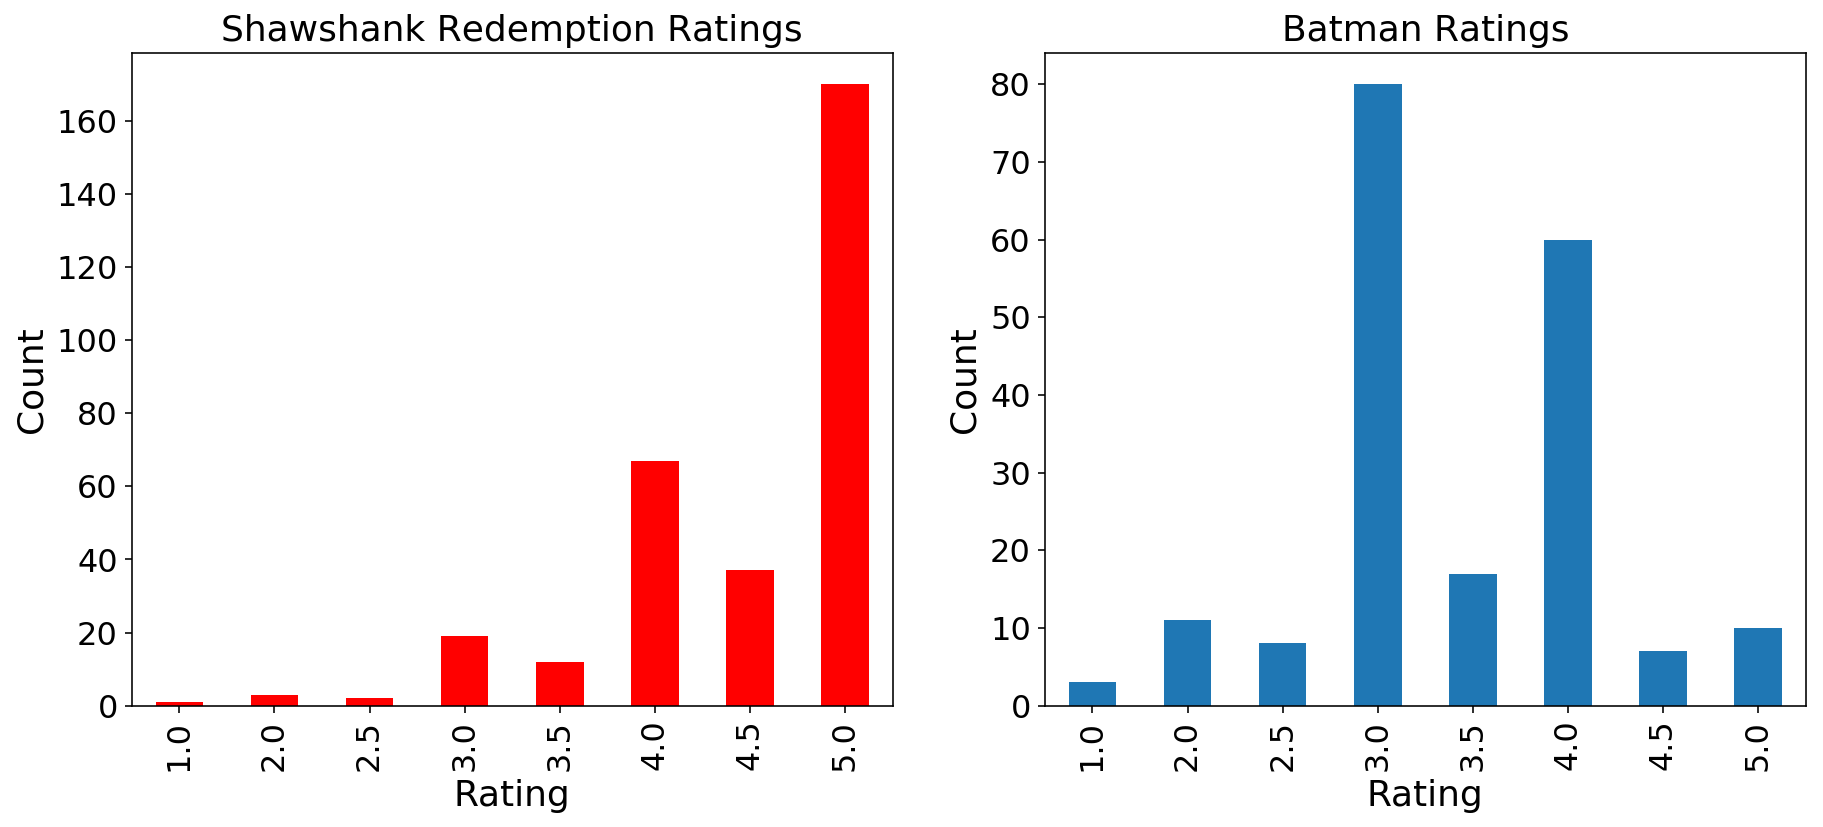

In [50]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ratings[ratings.title == 'Shawshank Redemption, The (1994)'].drop(['userId', 'movieId', 'genres'], 
                                                                  axis=1).groupby('rating').count().plot(kind='bar',
                                                                                                         color='r',
                                                                                                         fontsize=16,
                                                                                                         ax=ax[0],
                                                                                                         legend=False) 
                                                                                                         
ax[0].set_title('Shawshank Redemption Ratings', fontsize=18)
ax[0].set_xlabel('Rating', fontsize=18)
ax[0].set_ylabel('Count', fontsize=18)

ratings[ratings.title == 'Batman (1989)'].drop(['userId', 'movieId', 'genres'], 
                                                                  axis=1).groupby('rating').count().plot(kind='bar', 
                                                                                                         legend=False, 
                                                                                                         fontsize=16, 
                                                                                                         ax=ax[1])
ax[1].set_title('Batman Ratings', fontsize=18)
ax[1].set_xlabel('Rating', fontsize=18)
ax[1].set_ylabel('Count', fontsize=18)
plt.tight_layout;

In [21]:
pivot = pd.pivot_table(ratings, index='userId', columns='title', values='rating')

In [22]:
pivot.shape

(671, 9064)

In [23]:
pivot

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
sparse_pivot = sparse.csr_matrix(pivot.T.fillna(0))

In [25]:
print(sparse_pivot)

  (0, 206)	0.5
  (0, 556)	3.0
  (1, 131)	4.5
  (1, 467)	2.5
  (1, 487)	4.5
  (2, 133)	2.0
  (3, 206)	0.5
  (4, 206)	0.5
  (4, 546)	4.0
  (5, 133)	3.5
  (6, 206)	0.5
  (6, 563)	3.0
  (6, 604)	3.0
  (6, 655)	4.0
  (7, 5)	4.0
  (7, 55)	2.0
  (7, 57)	2.0
  (7, 133)	3.0
  (7, 267)	1.5
  (7, 284)	4.0
  (7, 285)	3.0
  (7, 293)	3.5
  (7, 344)	4.5
  (7, 387)	3.0
  (7, 397)	4.0
  :	:
  (9061, 284)	4.0
  (9061, 293)	3.0
  (9061, 305)	3.0
  (9061, 357)	1.0
  (9061, 379)	2.0
  (9061, 387)	4.0
  (9061, 407)	2.0
  (9061, 451)	2.0
  (9061, 456)	1.5
  (9061, 465)	3.0
  (9061, 467)	3.0
  (9061, 471)	3.0
  (9061, 508)	2.0
  (9061, 517)	4.0
  (9061, 563)	3.0
  (9061, 574)	3.0
  (9061, 579)	3.5
  (9061, 580)	3.5
  (9061, 620)	3.5
  (9061, 623)	3.0
  (9061, 637)	4.5
  (9061, 645)	4.0
  (9061, 653)	4.5
  (9062, 480)	4.5
  (9063, 269)	3.5


### Calculate cosine similarity using `pairwise_distances()`

In [26]:
distances = pairwise_distances(sparse_pivot, metric='cosine')

### Create distances DataFrame

In [27]:
distances.shape

(9064, 9064)

In [28]:
distances_df = pd.DataFrame(distances, index=pivot.columns, columns=pivot.columns)
distances_df

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.000000,1.000000,1.000000,0.835601,0.979609,1.000000,0.985954,1.000000,1.000000,0.996834,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
$9.99 (2008),1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.920526,1.000000,0.843670,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.986101,1.000000,0.941782,1.000000,1.000000
'Hellboy': The Seeds of Creation (2004),1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.782643,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
'Neath the Arizona Skies (1934),0.835601,1.000000,1.000000,0.000000,0.875965,1.000000,0.914564,1.000000,1.000000,0.980741,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
'Round Midnight (1986),0.979609,1.000000,1.000000,0.875965,0.000000,1.000000,0.989403,0.856214,1.000000,0.863837,...,1.000000,1.000000,1.000000,0.878433,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
'Salem's Lot (2004),1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.782643,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
'Til There Was You (1997),0.985954,1.000000,1.000000,0.914564,0.989403,1.000000,0.000000,0.888580,0.704042,0.998355,...,1.000000,1.000000,1.000000,0.842995,1.000000,1.000000,1.000000,0.918380,1.000000,1.000000
"'burbs, The (1989)",1.000000,0.920526,0.782643,1.000000,0.856214,0.782643,0.888580,0.000000,0.790848,0.912091,...,1.000000,1.000000,1.000000,0.915675,1.000000,0.876060,1.000000,0.668337,1.000000,1.000000
'night Mother (1986),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.704042,0.790848,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.823168,1.000000,1.000000,1.000000,0.785502,1.000000,1.000000


### Evaluate recommender performance

In [29]:
search = 'Matrix'
movies.loc[movies['title'].str.contains(search), :]

,movieId,title,genres
2062,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4603,6365,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
4880,6934,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX


In [30]:
search = 'Matrix'
for title in movies.loc[movies['title'].str.contains(search), 'title'].values:
    print(title)

Matrix, The (1999)
Matrix Reloaded, The (2003)
Matrix Revolutions, The (2003)


In [31]:
pivot['Matrix, The (1999)'].count()

259

In [32]:
search = 'Shawshank Redemption'
for title in movies.loc[movies['title'].str.contains(search), 'title'].values:
    print(title)
    print('Average Rating', pivot[title].mean())
    print('Count of ratings', pivot[title].count())
    print('Similar movies')
    print(distances_df[title].sort_values()[1:11])
    print('')
    print('')

Shawshank Redemption, The (1994)
Average Rating 4.487138263665595
Count of ratings 311
Similar movies
title
Pulp Fiction (1994)                 0.326045
Silence of the Lambs, The (1991)    0.340622
Forrest Gump (1994)                 0.342756
Usual Suspects, The (1995)          0.401438
Schindler's List (1993)             0.407621
Braveheart (1995)                   0.432712
Seven (a.k.a. Se7en) (1995)         0.434131
Fugitive, The (1993)                0.449233
Dances with Wolves (1990)           0.450477
Saving Private Ryan (1998)          0.455761
Name: Shawshank Redemption, The (1994), dtype: float64




In [33]:
def mean_center_rows(df):
    return (df.T - df.mean(axis=1)).T

pivot_mc = mean_center_rows(pivot)

pivot_mc = pivot_mc.fillna(0)

pivot_mc

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.738636,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [39]:
pivot

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
pivot_mc

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.738636,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [36]:
sim_matrix = cosine_similarity(mean_center_rows(pivot.T).fillna(0))
movies_sim = pd.DataFrame(sim_matrix, columns=pivot.T.index, index=pivot.T.index)
movies_sim

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",1.000000,0.000000,0.0,0.0,0.500000,0.0,0.581048,0.000000,0.0,0.367158,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
$9.99 (2008),0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.011719,0.0,0.146866,...,0.0,0.0,0.000000,0.000000,0.0,0.286708,0.0,0.041375,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
'Neath the Arizona Skies (1934),0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
'Round Midnight (1986),0.500000,0.000000,0.0,0.0,1.000000,0.0,0.581048,-0.202975,0.0,0.338336,...,0.0,0.0,0.000000,-0.140351,0.0,0.000000,0.0,0.000000,0.0,0.0
'Salem's Lot (2004),0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
'Til There Was You (1997),0.581048,0.000000,0.0,0.0,0.581048,0.0,1.000000,-0.002081,0.0,0.426672,...,0.0,0.0,0.000000,0.047971,0.0,0.000000,0.0,-0.007348,0.0,0.0
"'burbs, The (1989)",0.000000,0.011719,0.0,0.0,-0.202975,0.0,-0.002081,1.000000,0.0,-0.030700,...,0.0,0.0,0.000000,0.052228,0.0,0.027636,0.0,0.104025,0.0,0.0
'night Mother (1986),0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [37]:
search = 'Shawshank Redemption'
for title in movies.loc[movies['title'].str.contains(search), 'title'].values:
    print(title)
    print('Average Rating', pivot[title].mean())
    print('Count of ratings', pivot[title].count())
    print('Similar movies')
    print(movies_sim[title].sort_values()[1:11])
    print('')
    print('')

Shawshank Redemption, The (1994)
Average Rating 4.487138263665595
Count of ratings 311
Similar movies
title
Raven, The (1963)                                             -0.243137
American Ninja 2: The Confrontation (1987)                    -0.228703
Protector, The (a.k.a. Warrior King) (Tom yum goong) (2005)   -0.228703
District 13 (Banlieue 13) (2004)                              -0.225775
Jason and the Argonauts (1963)                                -0.221448
Last Starfighter, The (1984)                                  -0.219225
Land of the Dead (2005)                                       -0.218736
Remo Williams: The Adventure Begins (1985)                    -0.215152
Carnival of Souls (1962)                                      -0.214143
Quiet Earth, The (1985)                                       -0.200115
Name: Shawshank Redemption, The (1994), dtype: float64


